In [1]:
from tensorflow.keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np

# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Plain autoencoder.

In [3]:
latent_dim = 32

# Create the encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = encoder_input
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense(latent_dim, activation="relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

# Create the decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_input)
decoder_output = layers.Reshape((28, 28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Create the autoencoder.
ae = ngdlmodels.AE(encoder, decoder)
ae.compile(optimizer='adadelta', loss='binary_crossentropy')
ae.summary()

# Train.
print("Train...")
history = ae.fit(
        x_input_train, x_input_train,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = ae.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Encoder:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
Decoder:
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
____________________________________

60000/60000 [==============================] - 2s 30us/sample - loss: 0.6723 - val_loss: 0.6716
Epoch 49/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6711 - val_loss: 0.6703
Epoch 50/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6698 - val_loss: 0.6690
Evaluate...
10000/10000 [==============================] - 0s 36us/sample - loss: 0.6690
Loss: 0.6689502335548401


# Visualizing plain autoencoder.

Rendering history...


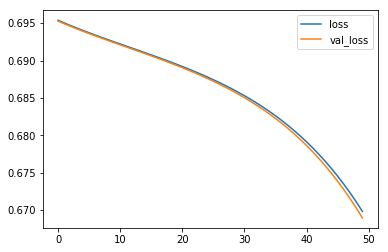

Rendering reconstructions...


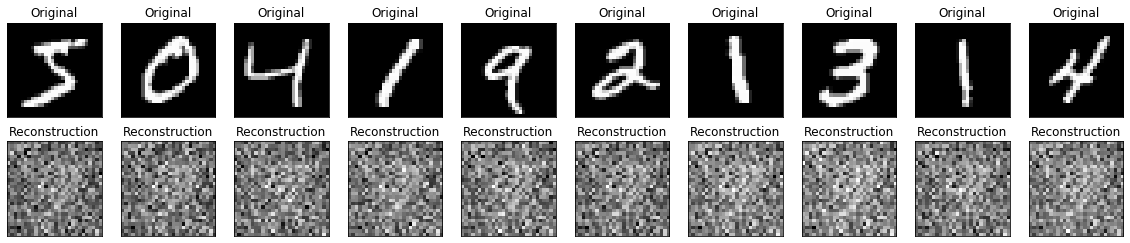

Rendering latent-space...


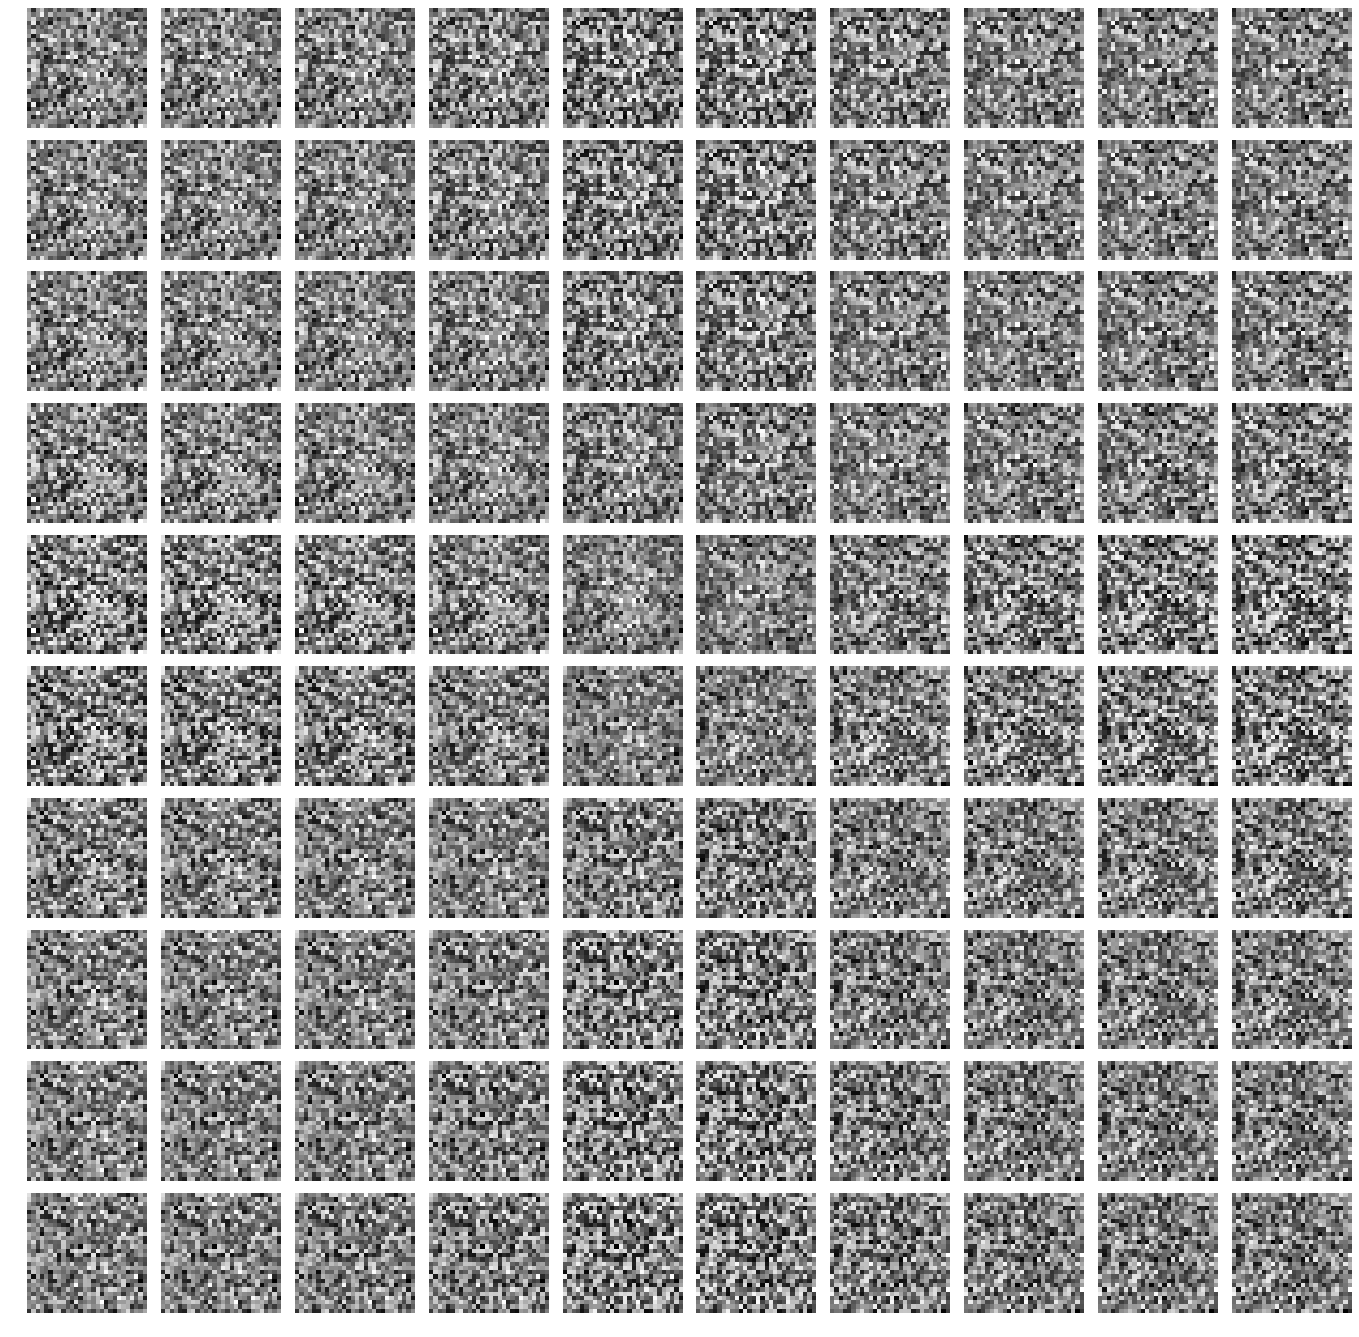

Rendering encodings...


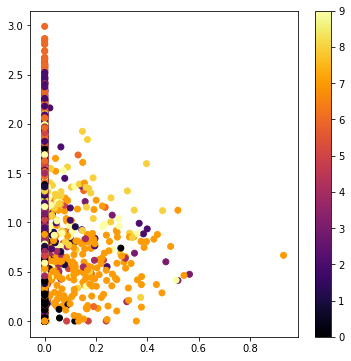

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(ae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(ae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(ae.encoder, x_input_test, y_output_test)